<a href="https://colab.research.google.com/github/mashdas/Deep_Learning_101/blob/master/iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

In [0]:
df=pd.read_csv("Iris.csv",na_values=["NA","?"])
df

In [0]:
df.isnull().sum()

In [0]:
X,y=df.iloc[:,1:5],df.iloc[:,5]

In [0]:
y=pd.get_dummies(df["Species"])

In [0]:
X,y=X.values,y.values

In [0]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [55]:
##Building a NN
import tensorflow as tf
from tensorflow.keras.layers import Dense,Activation
from tensorflow.keras import Sequential


model=Sequential()
model.add(Dense(50,input_dim=X.shape[1],activation='relu'))
model.add(Dense(25,activation='relu'))
model.add(Dense(y.shape[1],activation='softmax'))

monitor=EarlyStopping(monitor="val_loss",min_delta=1e-3,patience=5,verbose=1,
                      mode='auto',restore_best_weights=True)

model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
history=model.fit(X_train,y_train,verbose=1,epochs=35,validation_data=(X_test,y_test),call
                  =[monitor])

Epoch 1/35
4/4 [==============================] - 0s 30ms/step - loss: 0.9634 - accuracy: 0.5417 - val_loss: 0.9058 - val_accuracy: 0.5000
Epoch 2/35
4/4 [==============================] - 0s 9ms/step - loss: 0.8947 - accuracy: 0.4750 - val_loss: 0.8543 - val_accuracy: 0.5333
Epoch 3/35
4/4 [==============================] - 0s 10ms/step - loss: 0.8433 - accuracy: 0.4333 - val_loss: 0.8158 - val_accuracy: 0.3667
Epoch 4/35
4/4 [==============================] - 0s 9ms/step - loss: 0.7989 - accuracy: 0.4750 - val_loss: 0.7845 - val_accuracy: 0.4333
Epoch 5/35
4/4 [==============================] - 0s 9ms/step - loss: 0.7688 - accuracy: 0.5167 - val_loss: 0.7533 - val_accuracy: 0.4333
Epoch 6/35
4/4 [==============================] - 0s 10ms/step - loss: 0.7345 - accuracy: 0.4583 - val_loss: 0.7202 - val_accuracy: 0.4000
Epoch 7/35
4/4 [==============================] - 0s 9ms/step - loss: 0.7076 - accuracy: 0.4667 - val_loss: 0.6891 - val_accuracy: 0.5333
Epoch 8/35
4/4 [===============

In [0]:
def plot_lc(history,epochs):
  ##Accuracy
  epoch_range=range(1,epochs+1)
  plt.plot(epoch_range,history.history['accuracy'])
  plt.plot(epoch_range,history.history['val_accuracy'])
  plt.title("Model_accuracy")
  plt.ylabel("Accuracy")
  plt.xlabel("Epoch")
  plt.show()


   ##Loss
  epoch_range=range(1,epochs+1)
  plt.plot(epoch_range,history.history['loss'])
  plt.plot(epoch_range,history.history['val_loss'])
  plt.title("Model_loss")
  plt.ylabel("Loss")
  plt.xlabel("Epoch")

  plt.legend(["Train","Val"],loc="upper left")
  plt.show()

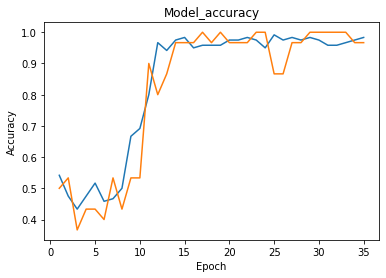

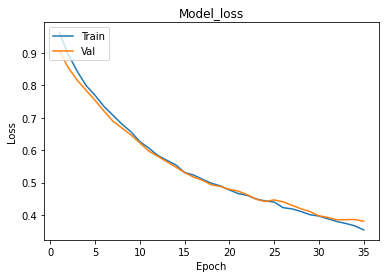

In [56]:
plot_lc(history,35)

In [0]:
##Doubt:SAME AS THE PREVIOS>>HERE ONLY 5 samples are used for training when 120 are available